In [1]:
import pandas as pd 
import nltk
from nltk.corpus import opinion_lexicon
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Restaurant_Reviews - Restaurant_Reviews.tsv',sep='\t')

In [3]:
df


,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [4]:
positive_words = set(opinion_lexicon.positive())

In [5]:
negative_words = set(opinion_lexicon.negative())

In [6]:
def function(t):
    s=nltk.word_tokenize(t)
    temp = []
    for i in s:
        if i in positive_words:
            temp.append(1)
        elif i in negative_words:
            temp.append(-1)
        else:
            temp.append(0)
    r = (sum(temp)/len(temp))
    return(r)

In [8]:
df['Status'] = df['Review'].apply(function)

In [9]:
def functions(h):
    temp = 0
    if h > 0:
    	temp = 1
    elif h < 0:
    	temp = -1
    else:
        temp = 0
    return temp

In [10]:
df['Sentiment_Score'] = df['Status'].apply(functions)

In [11]:
x = df['Sentiment_Score'].value_counts()

In [12]:
x

 1    457
 0    350
-1    193
Name: Sentiment_Score, dtype: int64

In [13]:
my_data_labels = ["Positive","Negative","Neutral"]

([<matplotlib.patches.Wedge at 0x24e9ea33190>,
 [Text(0.1481458317165507, 1.0899783541635182, 'Positive'),
  Text(-0.7428661685350717, -0.8112643562033417, 'Negative'),
  Text(0.9039209835262506, -0.626838779544578, 'Neutral')])

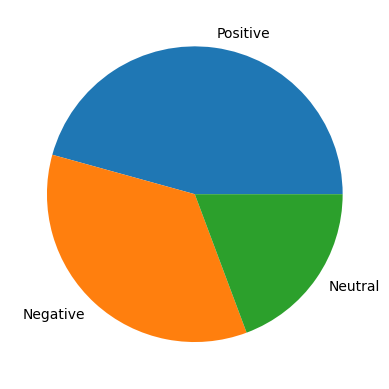

In [14]:
plt.pie(x, labels = my_data_labels)